<a href="https://colab.research.google.com/github/nihar-halder/da-project/blob/main/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google import colab
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, spearmanr, pearsonr, skew, kurtosis
from imblearn.over_sampling import SMOTE
import seaborn as sns
import scipy.cluster.hierarchy as sch

from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans, DBSCAN
from sklearn import tree

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN
from keras import metrics

In [ ]:
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab/UIU/DataAnalytics/SuicideBD/Filles

df = pd.read_csv('./PreprocessedSuicideBD.csv')
df2 = pd.read_csv('./PreprocessedSuicideBD.csv')

In [ ]:
df.age_group.value_counts()

TEEN           297
YOUTH          173
ADULT           99
MIDDLE-AGED     45
OLD             27
CHILD            8
Name: age_group, dtype: int64

In [ ]:
df.time.value_counts()

NIGHT        236
NOON         143
MORNING      137
EVENING       72
AFTERNOON     61
Name: time, dtype: int64

# **Data balancing**

In [ ]:
# Apply Data balancing
# Feature Selection
features = ['age_group', 'gender', 'reason']
# Create a new dataframe
features_df = df[features]

# Independent variables
X = pd.get_dummies(features_df)

# Target
y = df['method']
smote = SMOTE(k_neighbors=13)
X_smote, y_smote = smote.fit_resample(X=X, y=y)

In [ ]:
# Imbalanced data
y.value_counts()

HANGING          477
TAKING POISON    136
JUMPING           22
BRUTALITY         14
Name: method, dtype: int64

In [ ]:
# Balanced data
y_smote.value_counts()

HANGING          477
BRUTALITY        477
TAKING POISON    477
JUMPING          477
Name: method, dtype: int64

# **Classification:** DecisionTreeClassifier

In [ ]:
# Class names
class_names = ['HANGING', 'TAKING POISON', 'JUMPING', 'BRUTALITY']

# Data spliting for Training and testing
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.25, random_state=42)

# Training

model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)

# Testing
y_pred = model.predict(X_test)

Accuracy:  0.48846960167714887


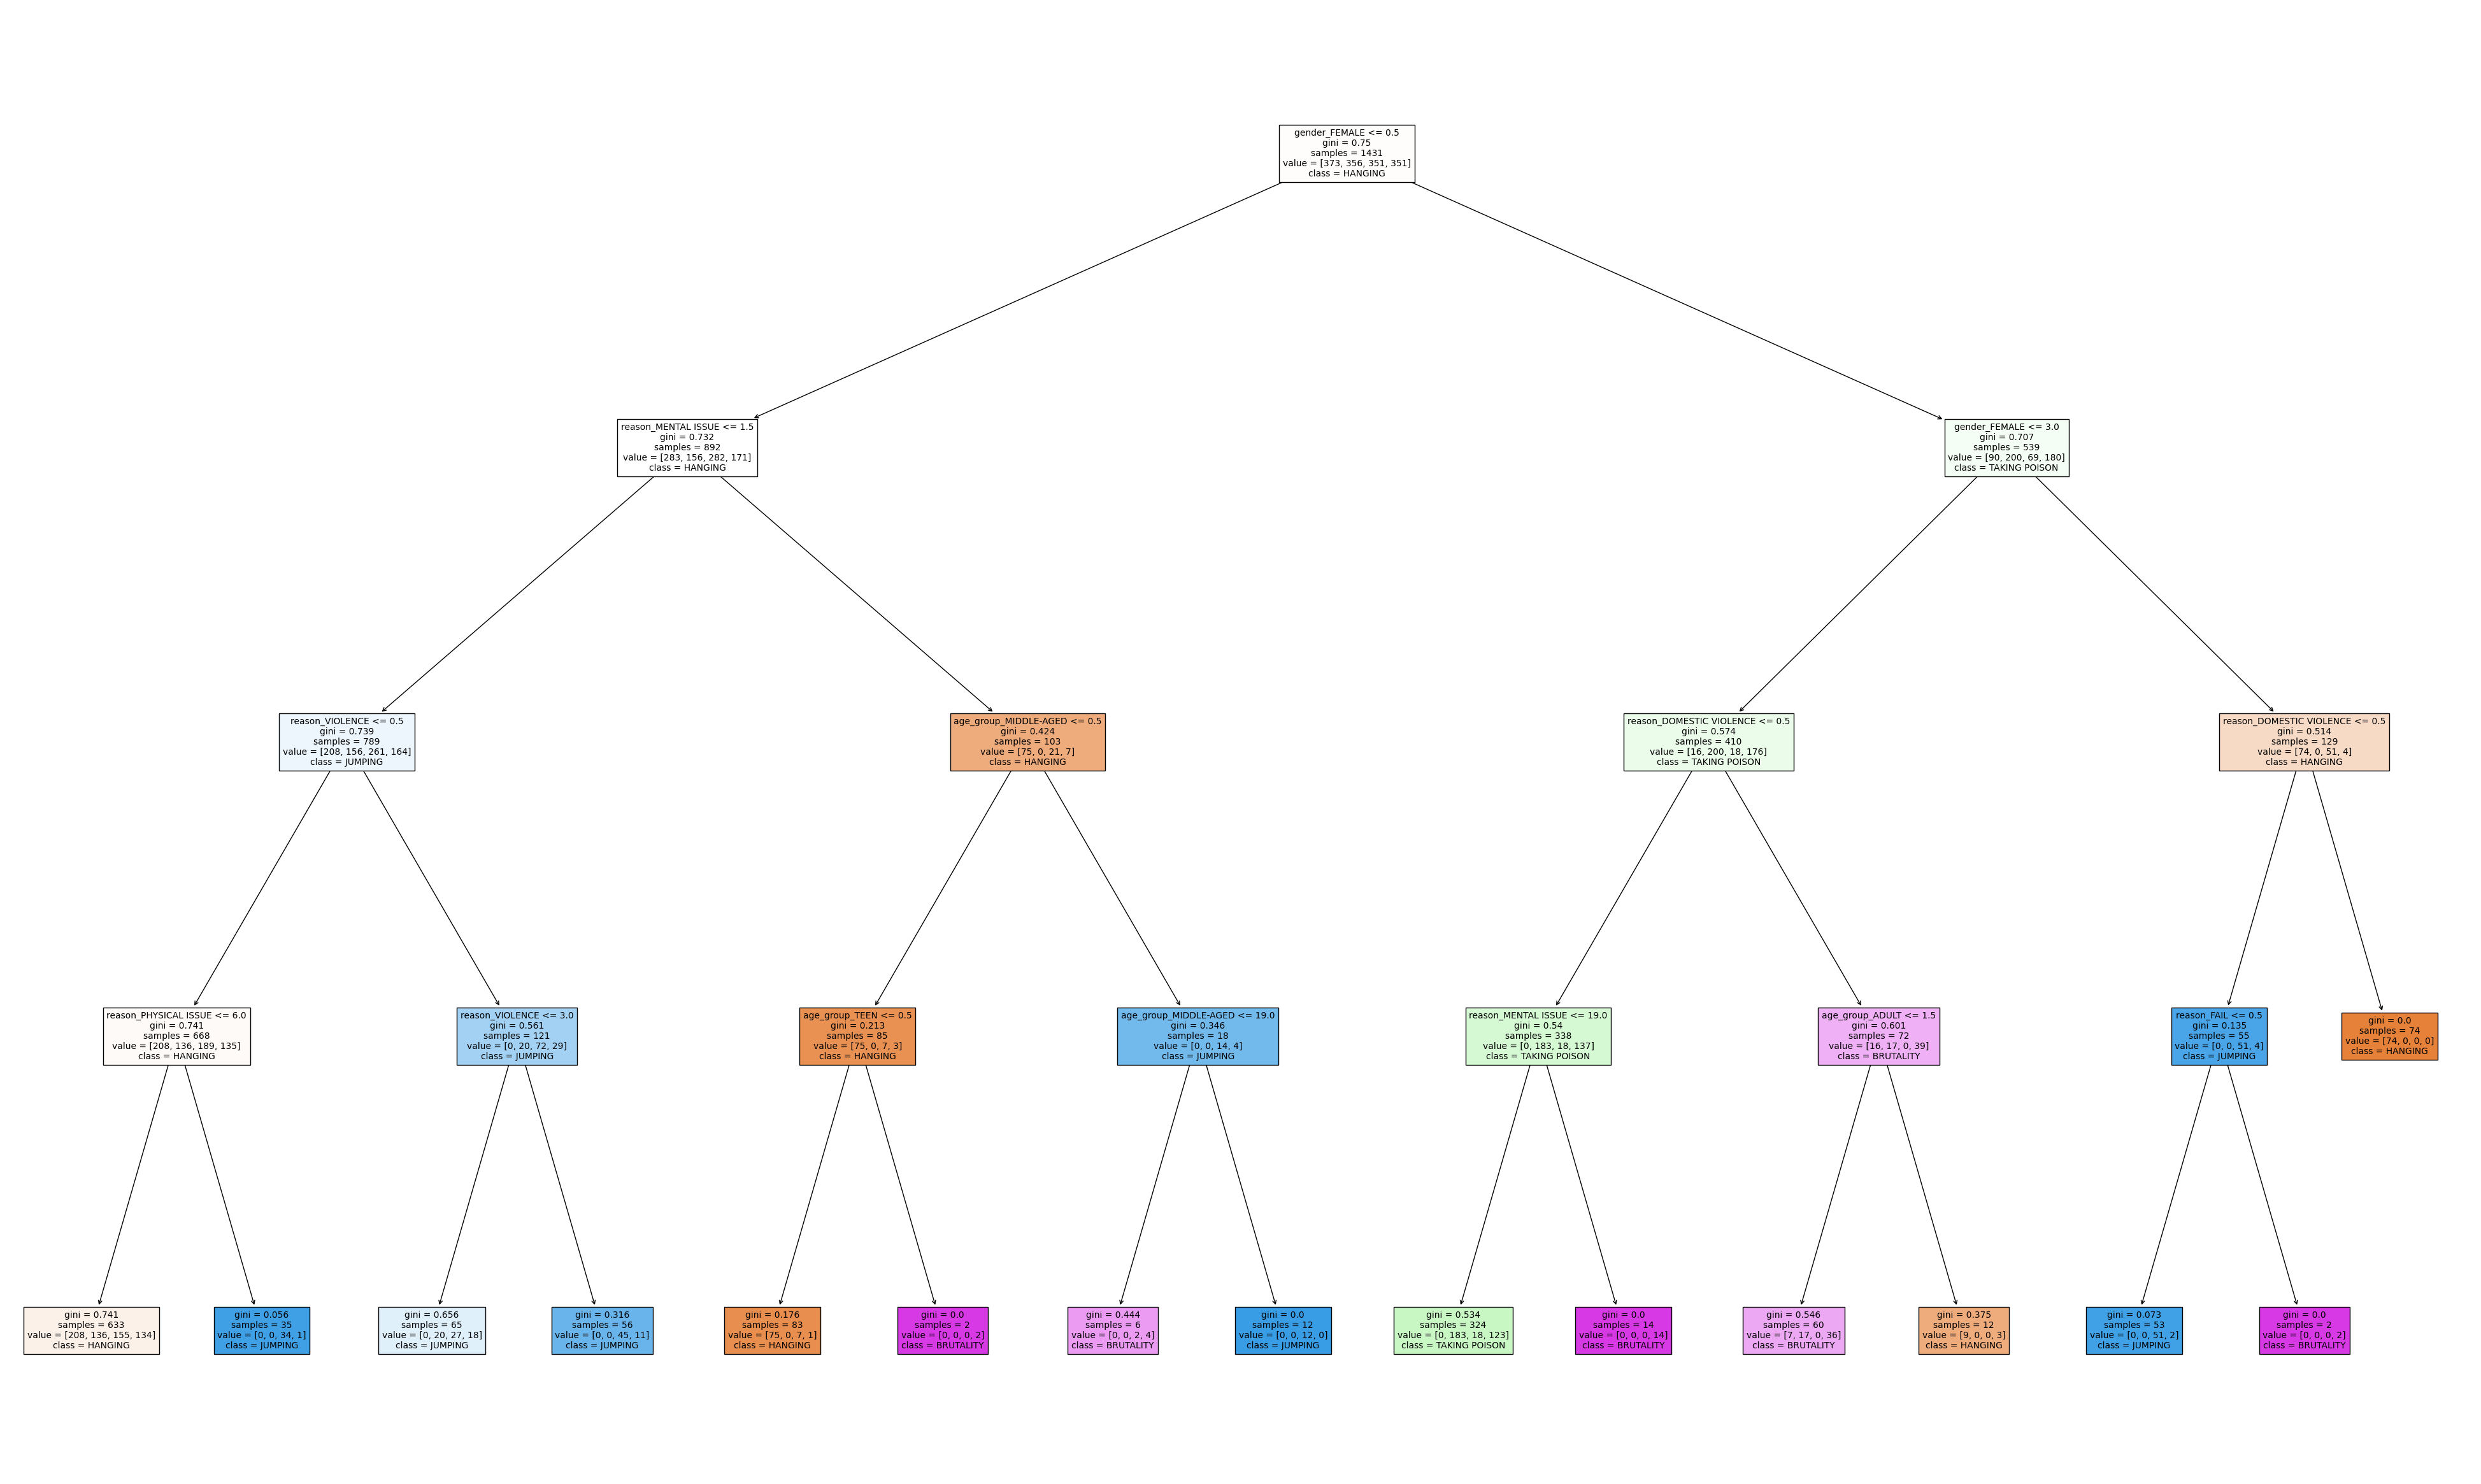

In [ ]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Plot Decision Tree FIgure
fig = plt.figure(figsize=(50, 30))
_ = tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=class_names)

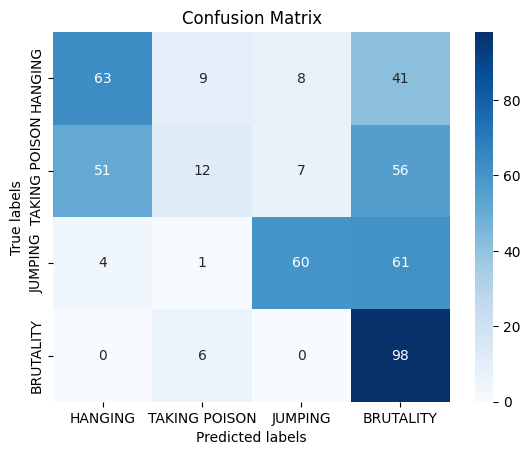

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=class_names)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

# **Classification:** KNN Classifier

In [ ]:
# Data spliting for Training and testing

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.25, random_state=42)
# Training

model = KNeighborsClassifier(n_neighbors=14)
model.fit(X_train, y_train)

# Testing
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.6352201257861635


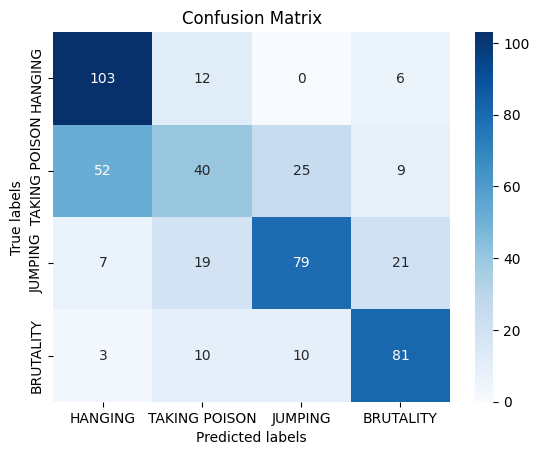

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=class_names)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

# **Classification:** Random Forest Classifier

In [ ]:
# Data spliting for Training and testing

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.25, random_state=42)
# Training

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Testing
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.7568134171907757


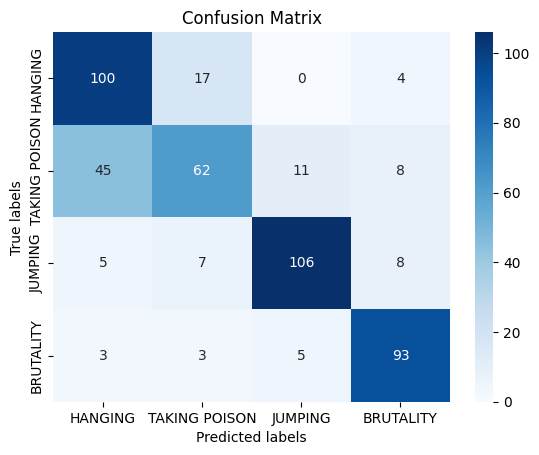

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=class_names)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

# **Classification:** AdaBoost Classifier

In [ ]:
# Data spliting for Training and testing

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.25, random_state=42)
# Training

model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Testing
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.4968553459119497


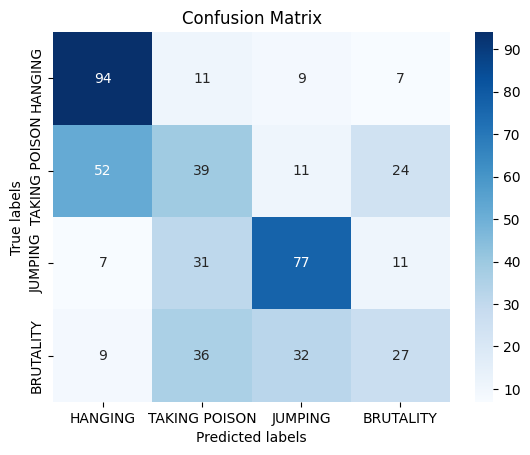

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=class_names)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

# **Regression**
**Linear Regression**

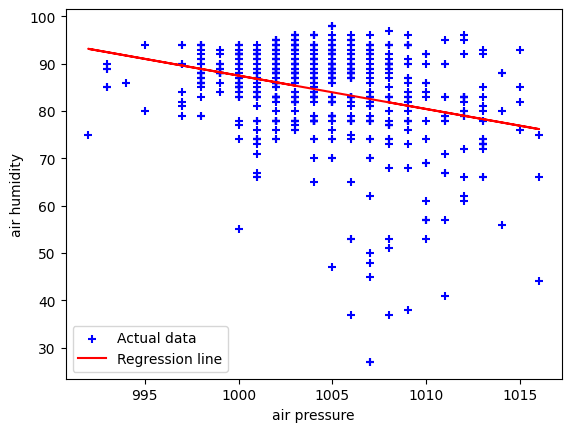

In [ ]:
# Feature Selection
features = ['air_pressure']
x = df[features]
y = df.air_humidity
# Create a linear regression model
lr = LinearRegression()

# Fit the model to the data
lr.fit(x, y)

# Show regrassion line
plt.scatter(x, y, label='Actual data', marker='+', color="Blue")  # Scatter plot of actual data
plt.plot(x, lr.predict(x), color='red', label='Regression line')  # Regression line
plt.xlabel('air pressure')
plt.ylabel('air humidity')
plt.legend()
plt.show()


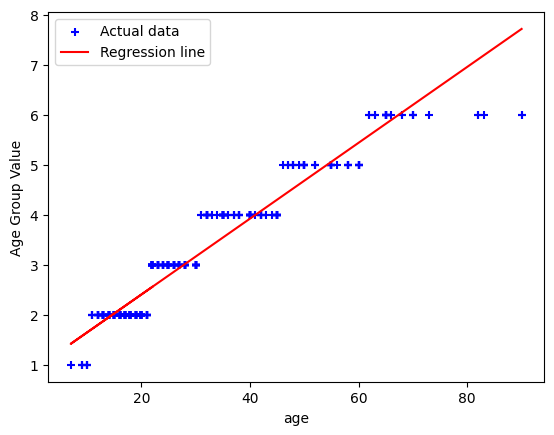

In [ ]:
# Feature Selection
features = ['age']
x = df[features]
y = df.age_group_val
# Create a linear regression model
lr = LinearRegression()

# Fit the model to the data
lr.fit(x, y)

# Show regrassion line
plt.scatter(x, y, label='Actual data', marker='+', color="Blue")  # Scatter plot of actual data
plt.plot(x, lr.predict(x), color='red', label='Regression line')  # Regression line
plt.xlabel('age')
plt.ylabel('Age Group Value')
plt.legend()
plt.show()

# **Regression:**
**Logistic Regression**

In [ ]:
# X velue using get_dummies

# Feature Selection
features = ['profession_group', 'time', 'reason']

# Create a new dataframe with only the selected features
s_features = df[features]

# Indepedent variables
# Convert categorical variable into dummy/indicator variables.
X = pd.get_dummies(s_features)

scaler = StandardScaler()

# Fit the scaler to the data and transform it
X_scaled = scaler.fit_transform(X)

# Data spliting for Training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df.gender, test_size=0.3, random_state=42)

# create logistic regression model
model = LogisticRegression()

# fit model to training data
model.fit(X_train, y_train)

# Testing
# make predictions on testing data
y_pred = model.predict(X_test)

# calculate accuracy of model
accuracy = accuracy_score(y_test, y_pred)
# Or model.score(X_test, y_test)
# model.predict_proba(X_test)

print("Accuracy:", accuracy)

Accuracy: 0.7333333333333333


## **Deep Learning:** LSTM

In [ ]:
!pip install --upgrade tensorflow keras

In [ ]:
# Encode categorical variables
cat_columns = ['age_group', 'gender', 'profession_group', 'reason', 'method']
label_encoders = {}
for col in cat_columns:
    label_encoders[col] = LabelEncoder()
    df2[col] = label_encoders[col].fit_transform(df2[col])
# Scale numerical variables
# num_columns = ['age', 'air_pressure', 'air_humidity']
# scaler = MinMaxScaler()
# df2[num_columns] = scaler.fit_transform(df2[num_columns])

# Step 2: Split the dataset into features (X) and desired variable (y)
features = ['age_group', 'gender', 'profession_group', 'reason']
# features = ['age_group', 'gender', 'profession_group', 'reason', 'time', 'method', 'weather_main', 'age', 'air_pressure', 'air_humidity']
X = df2[features]
y = df2['method']

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.astype(np.int32)
X_test = X_test.astype(np.int32)

# Step 4: Reshape the input data for LSTM
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Step 5: Create the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(1, X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

# Step 6: Compile the model
model.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['accuracy'])

# Step 7: Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=2)

Epoch 1/15
260/260 [==============================] - 8s 13ms/step - loss: 1.0113 - accuracy: 0.7129 - val_loss: 0.7524 - val_accuracy: 0.7846
Epoch 2/15
260/260 [==============================] - 1s 5ms/step - loss: 0.9312 - accuracy: 0.7225 - val_loss: 0.7487 - val_accuracy: 0.7846
Epoch 3/15
260/260 [==============================] - 1s 5ms/step - loss: 0.9308 - accuracy: 0.7225 - val_loss: 0.7480 - val_accuracy: 0.7846
Epoch 4/15
260/260 [==============================] - 1s 4ms/step - loss: 0.9307 - accuracy: 0.7225 - val_loss: 0.7476 - val_accuracy: 0.7846
Epoch 5/15
260/260 [==============================] - 1s 6ms/step - loss: 0.9307 - accuracy: 0.7225 - val_loss: 0.7474 - val_accuracy: 0.7846
Epoch 6/15
260/260 [==============================] - 1s 5ms/step - loss: 0.9307 - accuracy: 0.7225 - val_loss: 0.7472 - val_accuracy: 0.7846
Epoch 7/15
260/260 [==============================] - 1s 4ms/step - loss: 0.9307 - accuracy: 0.7225 - val_loss: 0.7471 - val_accuracy: 0.7846
Epoch

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss)+1)
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

**Curve**


<ipython-input-23-372efc688efe>:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, train_loss, 'y', label = 'Training loss', color='blue')
<ipython-input-23-372efc688efe>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'y', label = 'Validation loss', color='orange')


Text(0, 0.5, 'Loss')

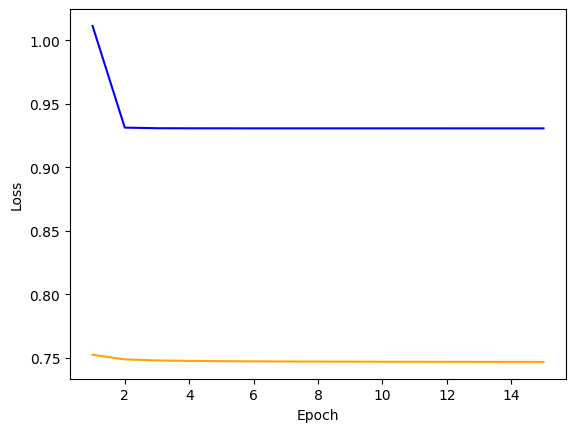

In [ ]:
plt.plot(epochs, train_loss, 'y', label = 'Training loss', color='blue')
plt.plot(epochs, val_loss, 'y', label = 'Validation loss', color='orange')
plt.xlabel("Epoch")
plt.ylabel("Loss")




<ipython-input-24-8e33afc2c06d>:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, train_accuracy, 'y', label = 'Training accuracy', color='blue')
<ipython-input-24-8e33afc2c06d>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_accuracy, 'y', label = 'Validation accuracy', color='orange')


Text(0, 0.5, 'Accuracy')

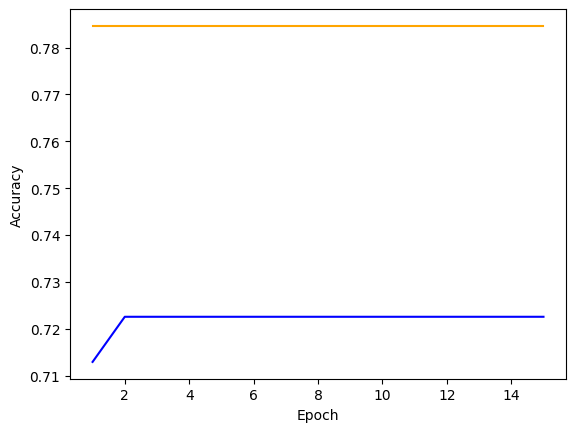

In [ ]:
plt.plot(epochs, train_accuracy, 'y', label = 'Training accuracy', color='blue')
plt.plot(epochs, val_accuracy, 'y', label = 'Validation accuracy', color='orange')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")



**Deep Learning:** RNN

In [ ]:
# Encode categorical variables
cat_columns = ['age_group', 'gender', 'profession_group', 'reason', 'method']
label_encoders = {}
for col in cat_columns:
    label_encoders[col] = LabelEncoder()
    df2[col] = label_encoders[col].fit_transform(df2[col])
# Scale numerical variables
# num_columns = ['age', 'air_pressure', 'air_humidity']
# scaler = MinMaxScaler()
# df2[num_columns] = scaler.fit_transform(df2[num_columns])

# Step 2: Split the dataset into features (X) and desired variable (y)
features = ['age_group', 'gender', 'profession_group', 'reason']
# features = ['age_group', 'gender', 'profession_group', 'reason', 'time', 'method', 'weather_main', 'age', 'air_pressure', 'air_humidity']
X = df2[features]
y = df2['method']

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.astype(np.int32)
X_test = X_test.astype(np.int32)

# Step 4: Reshape the input data for RNN
X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Step 5: Create the RNN model
model = Sequential()
model.add(SimpleRNN(64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))


# Step 6: Compile the model
model.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['accuracy'])

# Step 7: Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=2)

Epoch 1/15
260/260 [==============================] - 4s 5ms/step - loss: 0.9574 - accuracy: 0.7148 - val_loss: 0.7496 - val_accuracy: 0.7846
Epoch 2/15
260/260 [==============================] - 1s 3ms/step - loss: 0.9308 - accuracy: 0.7225 - val_loss: 0.7468 - val_accuracy: 0.7846
Epoch 3/15
260/260 [==============================] - 1s 3ms/step - loss: 0.9307 - accuracy: 0.7225 - val_loss: 0.7464 - val_accuracy: 0.7846
Epoch 4/15
260/260 [==============================] - 1s 3ms/step - loss: 0.9306 - accuracy: 0.7225 - val_loss: 0.7464 - val_accuracy: 0.7846
Epoch 5/15
260/260 [==============================] - 1s 3ms/step - loss: 0.9306 - accuracy: 0.7225 - val_loss: 0.7463 - val_accuracy: 0.7846
Epoch 6/15
260/260 [==============================] - 1s 4ms/step - loss: 0.9306 - accuracy: 0.7225 - val_loss: 0.7463 - val_accuracy: 0.7846
Epoch 7/15
260/260 [==============================] - 1s 3ms/step - loss: 0.9306 - accuracy: 0.7225 - val_loss: 0.7463 - val_accuracy: 0.7846
Epoch 

<ipython-input-26-a3278b181bea>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, train_loss, 'y', label = 'Training loss', color='blue')
<ipython-input-26-a3278b181bea>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'y', label = 'Validation loss', color='orange')


Text(0, 0.5, 'Loss')

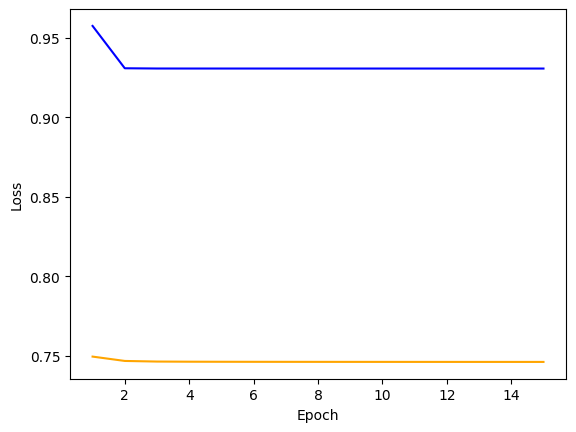

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss)+1)
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(epochs, train_loss, 'y', label = 'Training loss', color='blue')
plt.plot(epochs, val_loss, 'y', label = 'Validation loss', color='orange')
plt.xlabel("Epoch")
plt.ylabel("Loss")


<ipython-input-27-8e33afc2c06d>:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, train_accuracy, 'y', label = 'Training accuracy', color='blue')
<ipython-input-27-8e33afc2c06d>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_accuracy, 'y', label = 'Validation accuracy', color='orange')


Text(0, 0.5, 'Accuracy')

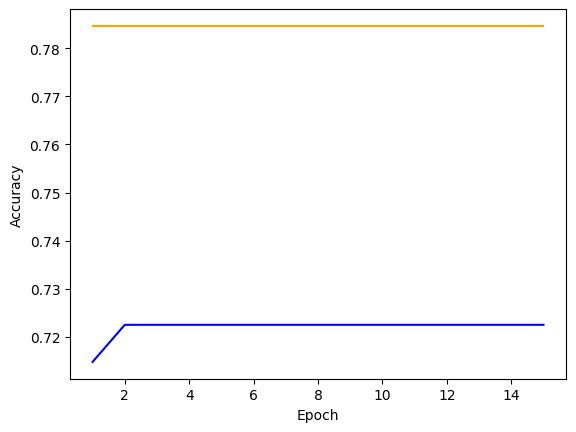

In [ ]:
plt.plot(epochs, train_accuracy, 'y', label = 'Training accuracy', color='blue')
plt.plot(epochs, val_accuracy, 'y', label = 'Validation accuracy', color='orange')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")



**Clustering:** K-means clustering

In [ ]:
# Select the columns for clustering
columns_for_clustering = ['age_group', 'reason', 'profession_group', 'month']

# Create a new dataframe with the selected columns
df_clustering = df[columns_for_clustering]

# Perform one-hot encoding
df_encoded = pd.get_dummies(df_clustering)

# Apply one-hot encoding on selected categorical columns
df_encoded = pd.get_dummies(df[columns_for_clustering])

# Apply K-means clustering
kmeans = KMeans(n_clusters=3)  # Specify the number of clusters you want to identify
kmeans.fit(df_encoded)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the original dataframe
df['cluster'] = cluster_labels

# Print the clusters
print(df['cluster'].value_counts())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1    259
0    197
2    193
Name: cluster, dtype: int64


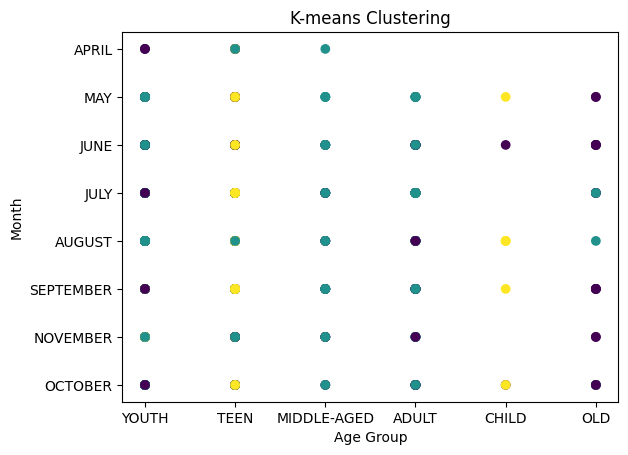

In [ ]:
# Plotting the clusters
plt.scatter(df['age_group'], df['month'], c=df['cluster'])
plt.xlabel('Age Group')
plt.ylabel('Month')
plt.title('K-means Clustering')
plt.show()

Clustering: DBSCAN

In [ ]:
#Select the columns for clustering
columns_for_clustering = ['age_group', 'month']

# Create a new dataframe with the selected columns
df_clustering = df[columns_for_clustering]

# Apply one-hot encoding
df_encoded = pd.get_dummies(df_clustering)

# Scale the encoded data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
cluster_labels = dbscan.fit_predict(df_scaled)

# Add the cluster labels to the original dataframe
df['cluster'] = cluster_labels

# Print the clusters
print(df['cluster'].value_counts())

 2     49
 14    48
 15    46
 25    46
 7     39
 28    34
 16    34
 13    33
 1     31
 27    30
-1     24
 18    20
 11    19
 26    18
 29    17
 0     17
 6     16
 5     16
 17    15
 4     13
 9      9
 20     9
 3      9
 23     8
 30     8
 22     7
 24     7
 12     6
 19     6
 10     5
 21     5
 8      5
Name: cluster, dtype: int64


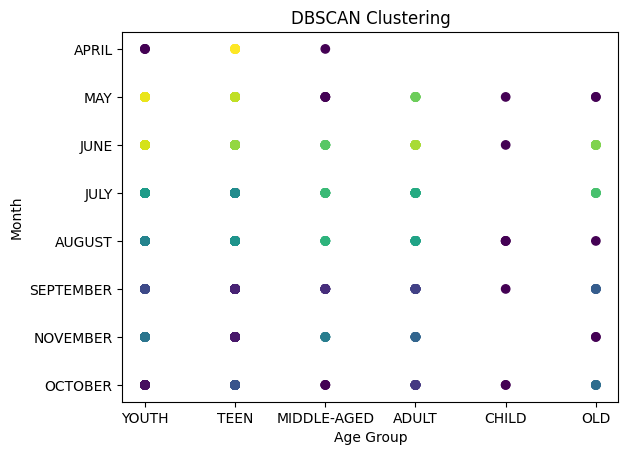

In [ ]:
# Plotting the clusters
plt.scatter(df['age_group'], df['month'], c=df['cluster'])
plt.xlabel('Age Group')
plt.ylabel('Month')
plt.title('DBSCAN Clustering')
plt.show()

# Preprosseing

**Boxpot**

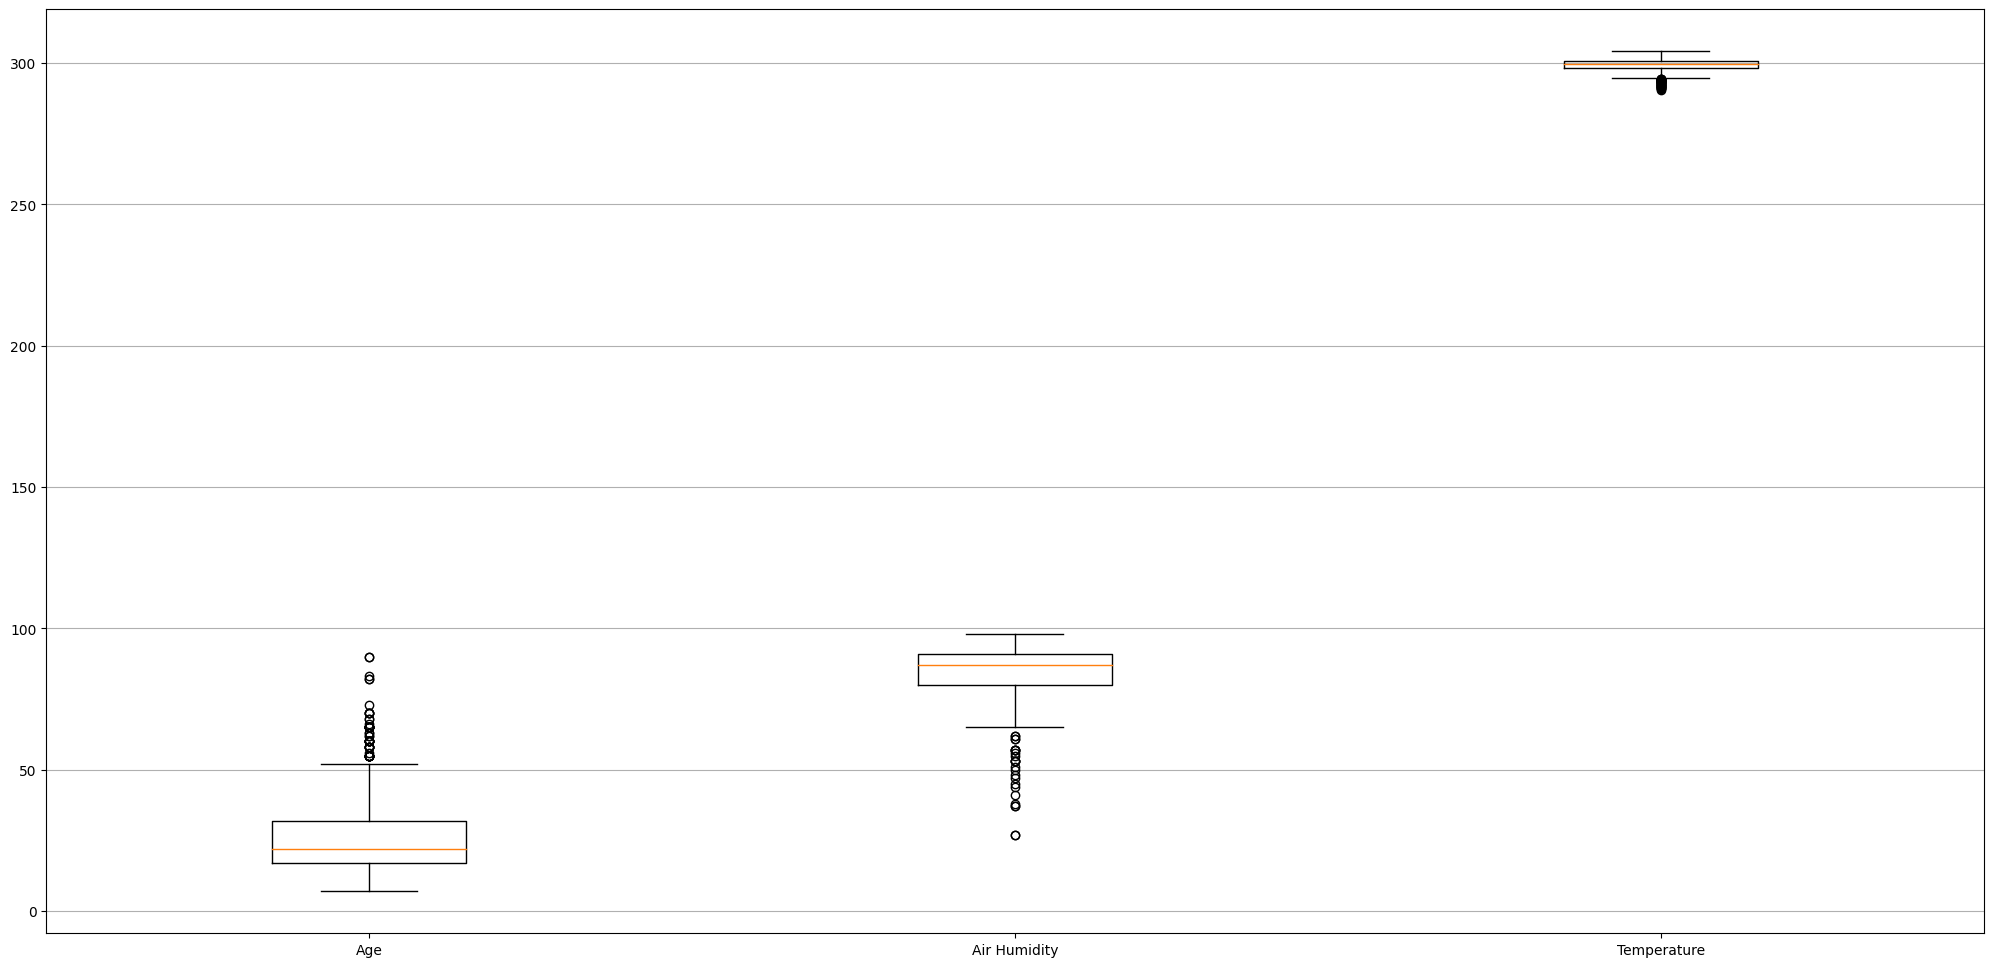

In [ ]:
# Figure settings

fig = plt.figure(figsize =(25, 12))
plt.grid(axis='y')

# Feature Selection
features = ['age', 'air_humidity', 'temperature']

# Create a new dataframe with only the selected features
features_df = df[features]

plt.boxplot(features_df, vert=True, notch=False, )
plt.xticks([1,2,3], ['Age', 'Air Humidity', 'Temperature'])


plt.show()

**Central tendency**

In [ ]:
# Feature Selection
features = ['age', 'air_humidity','temperature']
features_labels = ['Age', 'Air Humidity', 'Temperature']

# Create a new dataframe with only the selected features
features_df = df[features]


means = features_df.mean().values.reshape((3))
medians = features_df.median().values.reshape((3))
modes = features_df.mode().values.reshape((3))

In [ ]:
c_df = pd.DataFrame({
    'Feature': features_labels,
    'Mean': means,
    'Median': medians,
    'Mode': modes
})

c_df

,Feature,Mean,Median,Mode
0,Age,26.927581,22.00,20.00
1,Air Humidity,84.322034,87.00,83.00
2,Temperature,299.160370,299.51,301.15


****

In [ ]:
hometown = df.hometown.mode()
age_group = df.age_group.mode()
gender = df.gender.mode()
profession_group = df.profession_group.mode()
reason = df.reason.mode()
time = df.time.mode()
method = df.method.mode()
weather_main = df.weather_main.mode()
month = df.month.mode()

print('Mode of hometown: ', hometown)
print('Mode of age group: ', age_group)
print('Mode of gender: ', gender)
print('Mode of profession_group: ', profession_group)
print('Mode of reason: ', reason)
print('Mode of time: ', time)
print('Mode of method: ', method)
print('Mode of weather_main: ', weather_main)
print('Mode of month: ', month)

Mode of hometown:  0    RAJSHAHI
Name: hometown, dtype: object
Mode of age group:  0    TEEN
Name: age_group, dtype: object
Mode of gender:  0    FEMALE
Name: gender, dtype: object
Mode of profession_group:  0    UNOCCUPIED
Name: profession_group, dtype: object
Mode of reason:  0    FAMILY ISSUE
Name: reason, dtype: object
Mode of time:  0    NIGHT
Name: time, dtype: object
Mode of method:  0    HANGING
Name: method, dtype: object
Mode of weather_main:  0    CLOUDS
Name: weather_main, dtype: object
Mode of month:  0    JULY
Name: month, dtype: object


**Dispersion using standard deviation and variance**

In [ ]:
std_age = df.age.std()
var_age = df.age.var()
std_temperature = df.temperature.std()
var_temperature = df.temperature.var()
std_air_humidity = df.air_humidity.std()
var_air_humidity = df.air_humidity.var()

print('Standard deviation of age: ', std_age)
print('Variance of age: ', var_age)
print('Standard deviation of air_humidity: ', std_air_humidity)
print('Variance of air_humidity: ', var_air_humidity)
print('Standard deviation of temperature: ', std_temperature)
print('Variance of temperature: ', var_temperature)


Standard deviation of age:  14.458838784099248
Variance of age:  209.05801898457264
Standard deviation of air_humidity:  9.96410958427752
Variance of air_humidity:  99.2834798074911
Standard deviation of temperature:  2.2308951973491844
Variance of temperature:  4.976893381555656


**Skewness and Kurtosis**

In [ ]:
skew_age = df.age.skew()
kurtosis_age = df.age.kurtosis()
skew_air_humidity = df.air_humidity.skew()
kurtosis_air_humidity = df.air_humidity.kurtosis()
skew_temperature = df.temperature.skew()
kurtosis_temperature = df.temperature.kurtosis()

print('Skewness of age: ', skew_age)
print('Kurtosis of age: ', kurtosis_age)
print('Skewness of air_humidity: ', skew_air_humidity)
print('Kurtosis of air_humidity: ', kurtosis_air_humidity)
print('Skewness of temperature: ', skew_temperature)
print('Kurtosis of temperature: ', kurtosis_temperature)





Skewness of age:  1.575862088214256
Kurtosis of age:  2.3051886695100805
Skewness of air_humidity:  -2.1728984932227666
Kurtosis of air_humidity:  6.991007946116574
Skewness of temperature:  -1.3690610229012428
Kurtosis of temperature:  2.402035971222565


**Ploting figures**

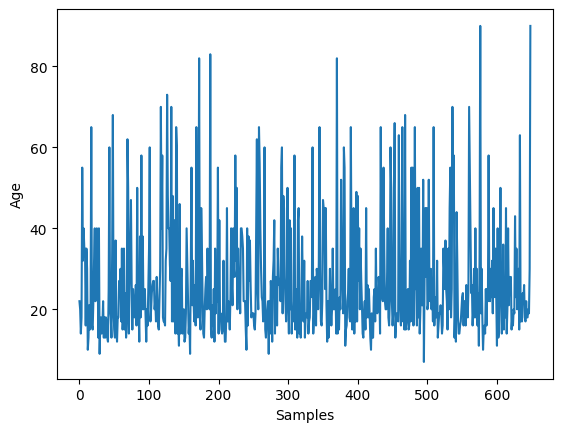

In [ ]:
fig = plt.figure()
plt.xlabel('Samples')
plt.ylabel('Age')  
plt.plot(df.index, df.age)
plt.show()

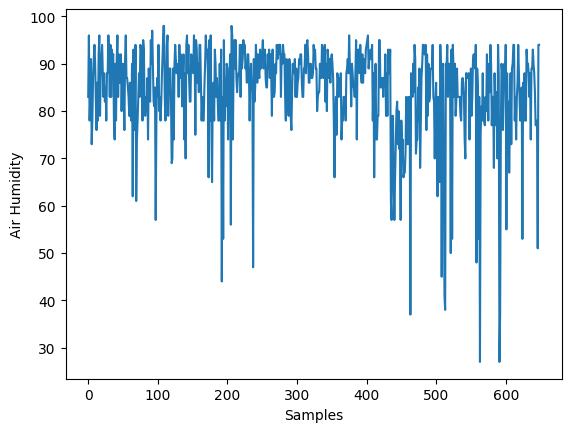

In [ ]:
fig = plt.figure()
plt.xlabel('Samples')
plt.ylabel('Air Humidity')  
plt.plot(df.index, df.air_humidity)
plt.show()

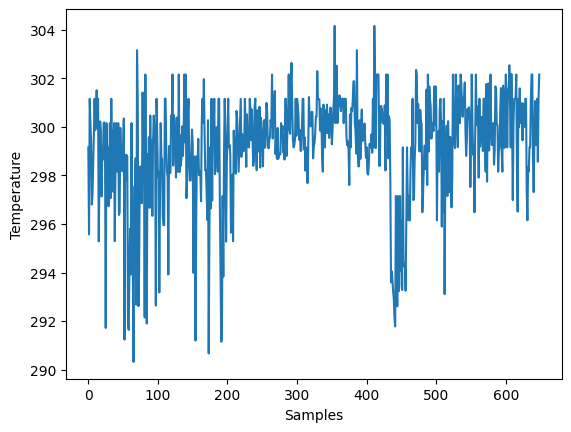

In [ ]:
fig = plt.figure()
plt.xlabel('Samples')
plt.ylabel('Temperature')  
plt.plot(df.index, df.temperature)
plt.show()

**Outlier detection**

In [ ]:
outliers_age=[]
outliers_air_humidity=[]
outliers_temperature=[]
threshold = 3.5

mean_age = df.age.mean()
for i in df.age:
  z_score = (i - mean_age)/std_age
  if np.abs(z_score) > threshold:
    outliers_age.append(i)

mean_air_humidity = df.air_humidity.mean()
for i in df.air_humidity:
  z_score = (i - mean_air_humidity)/std_air_humidity
  if np.abs(z_score) > threshold:
    outliers_air_humidity.append(i)

mean_temperature = df.temperature.mean()
for i in df.temperature:
  z_score = (i - mean_temperature)/std_temperature
  if np.abs(z_score) > threshold:
    outliers_temperature.append(i)
print('Outliers in age: ', outliers_age)
print('Outliers in air_humidity: ', outliers_air_humidity)
print('Outliers in temperature: ', outliers_temperature)


Outliers in age:  [82, 83, 82, 90, 90]
Outliers in air_humidity:  [44, 47, 37, 45, 41, 38, 48, 27, 27, 37]
Outliers in temperature:  [291.24, 290.32, 291.2, 290.67, 291.15, 291.34]


**Pearson Correlation**: Correlation between air pressure and air humidity

In [ ]:
corr, _ = pearsonr(df['air_pressure'], df['air_humidity'])
print('correlation: %.3f' % corr)


correlation: -0.294


**Spearman Correlation**: Correlation between air pressure and air humidity

In [ ]:
corr, _ = spearmanr(df['air_pressure'], df['air_humidity'])
print('correlation: %.3f' % corr)

correlation: -0.235


**Hypothesis:** “There is a relation between cause of suicide and age group”

**Null Hypothesis:** “There is no relation between cause of suicide and age group”

**Chi-square test:** Age group and Reason

In [ ]:
contigency = pd.crosstab(df['age_group'],df['reason'])
c, p, dof, expected = chi2_contingency(contigency)

print("Statistical value: " + str(c))
print("P value: " + str(p))
print("Degree of fredom: " + str(dof))

Statistical value: 184.79971293094448
P value: 1.2296295636151766e-14
Degree of fredom: 60


In [ ]:
significance_level= 0.05
if p<= significance_level:
  print("Reject null hypthesis")
else:
  print("Accept null hypothesis")

Reject null hypthesis
